# 0. 라이브러리 임포트

In [9]:
# 다운 라이브러리
#%pip install konlpy
#%pip install tensorflow
%pip install wordcloud

# 크롤링
import bs4
from bs4 import BeautifulSoup
import requests
import re
import selenium

# nlp
import konlpy
from konlpy.tag import *
import nltk
from nltk.corpus import stopwords 

# 분석
import pandas as pd
import numpy as np
import scipy
import tensorflow as tf

# 시각화
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud
from collections import Counter

# 폰트 설정
font_path = r'C:\\windows\\fonts\\nanumgothicbold.ttf'
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font',family = font)

# 1. 자연어 처리

## 1-1. 한국어

In [2]:
 sent1 = '''
정보사회의 도래에 대해서 이의를 제기하는 사람은 이제 아무도 없다. 오늘날과 같은 정보사회에 있어서의 정보는 개인에서부터 조직이나 국가에 이르기까지 그 중요성이 점차 증대되고 있다. 이렇듯이 과학기술의 발달과 학문의 세분화로 인하여 대량의 정보가 생산될 수밖에 업는 현대 사회적 속성을 우리는 ‘정보의 폭발’ 또는 ‘정보의 홍수’라는 현상으로 설명하고 있다.

이와 같이 사회 현상은 학문의 영역에도 큰 변화를 일으키기 시작하였다. 정보사회에 적극 대응하기 위한 컴퓨터 과학의 급성장과 정보에 대한 새로운 해석 및 가치 부여를 시도하고 있는 문헌정보학(Information Science)이 그것이라 할 수 있겠다.
그 중에서도 문헌정보학은 기하급수적으로 증가하고 있는 각종 정보에 대하여 가장 신속, 정확하게 최적의 정보를 이용자에게 제공할 수 있도록 그 처리 방법을 개발하는 것을 궁극적인 목표로 한다고 할 수 있다.

이와 같은 요구에 부응하여 1960년대 초에 새로워진 문헌정보학은 전통적인 도서관학(Library Science)의 연구방법론과는 달리 주로 정보의 발생, 성질, 행태 및 유통현상에 관한 일반적 원리를 추구하는 순수과학적 측면과, 효과적이며 능률적인 정보유통시스템의 설계와 운용에 관계된 응용과학적 측면을 공히 포함하고 있는 학문이라 할 수 있다.

특히 정보사회의 특징 중에서 문헌정보학의 연구대상이 되는 분야로 과학 문헌을 통한 과학정보의 유통현상 및 과학자집단의 비공식 커뮤니케이션 등을 들 수 있다. 이러한 현상을 과학적으로 규명하기 위한 방법론으로서 문헌정보학에서는 계량서지학(Bibliometrics) 또는 계량과학(Science-metrics)이라 불리우는 방법론 등을 연구 발전시켜오고 있다.

'''

In [3]:
hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
#mecab = Mecab()
okt = Okt()

In [4]:
set1 = hannanum.nouns(sent1)

In [16]:
ko_stopwords = ['문헌정보학','문헌정보','문헌정보학(Information',
'것','수','듯','우리','을','를','은','는','이','가','중',
'등','초','학문','측면','오늘날','그것','아무']

C:\Users\user\AppData\Local\Temp\ipykernel_38040\779178658.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(rmv_idx, 0, inplace= True)


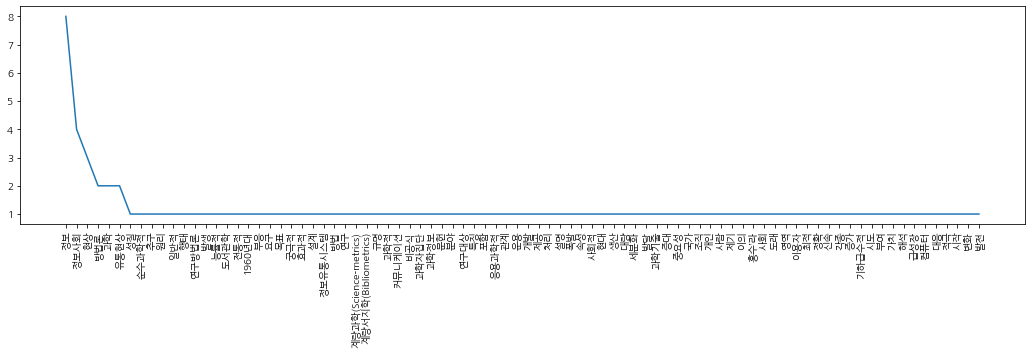

In [40]:
# 형태소 수 카운팅
def morp_count(sent):
    morp = {}
    for x in sent:
        if x in morp.keys():
            morp[x] += 1
        else: 
            morp[x] = 1
    temp_df = pd.DataFrame(columns = ['형태소','빈도수'])
    temp_df['형태소'] = morp.keys()
    temp_df['빈도수'] = morp.values()
    temp_df = temp_df.sort_values(by='빈도수', ascending=False)
    return temp_df

# 불용어 제거
def remove_stopword(df, stopword_dict):
    rmv_idx = []
    for i in range(len(df)):
        if df['형태소'][i] in stopword_dict:
            rmv_idx.append(i)
    df.drop(rmv_idx, 0, inplace= True)
    return df

def clean_morps(sent, stopword_dict):
    clean_dict = {"‘정보":'정보'," 홍수’라":'홍수',"도서관학(Library":'도서관학',"폭발’":'폭발'}
    idx = 0
    for x in sent:
        if x in stopword_dict:
            sent[idx] = 0
        elif x in clean_dict.keys():
            sent[idx] = clean_dict[x]
        idx += 1
    # 불용어 제거
    for x in sent:
        if x == 0:
            sent.remove(x)
    return sent

# 형태소 빈도 시각화
def vis_cnt(df):
    plt.figure(figsize = (18,4))
    plt.plot(df['형태소'],df['빈도수'])
    plt.xticks(rotation = 90)


set2= clean_morps(set1, ko_stopwords)
set2 = morp_count(set1)
set2 = remove_stopword(set2, ko_stopwords)
vis_cnt(set2)

## 1-2. 영어

In [39]:
letter = '''
Dear Eva,

It will be almost a month since you wrote to me and you have possibly forgotten your state of mind (I doubt it though). You seem the same as always, and being you, hate every minute of it. Don’t! Learn to say “Fuck You” to the world once in a while. You have every right to. Just stop thinking, worrying, looking over your shoulder, wondering, doubting, fearing, hurting, hoping for some easy way out, struggling, grasping, confusing, itching, scratching, mumbling, bumbling, grumbling, humbling, stumbling, numbling, rambling, gambling, tumbling, scumbling, scrambling, hitching, hatching, bitching, moaning, groaning, honing, boning, horse-shitting, hair-splitting, nit-picking, piss-trickling, nose sticking, ass-gouging, eyeball-poking, finger-pointing, alleyway-sneaking, long waiting, small stepping, evil-eyeing, back-scratching, searching, perching, besmirching, grinding, grinding, grinding away at yourself. Stop it and just

DO
'''

### 1-2-1. 토큰화

### 1-2-2. 스테밍

### 1-2-3. 표제어 추출

### 1-2-4. 품사 태깅

### 1-2-5. 불용어 제거

# 2.  분석

## 2-1. 단어 빈도수 분석 

## 2-2. 단어 워드클라우드

In [ ]:
from wordcloud import WordCloud
from collections import Counter

In [29]:
wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color = "white"
)

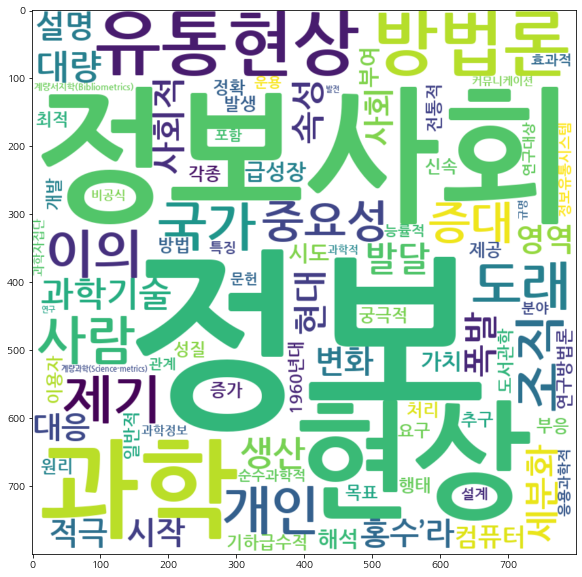

In [38]:
set3 = remove_stopword_to_li(set1, ko_stopwords)
count = Counter(set3)

wordcloud = wordcloud.generate_from_frequencies(count)
array = wordcloud.to_array()
fig = plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

## 2-3. 단어 임베딩